In [119]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as spi
import scipy.stats as sts
%matplotlib inline

In [120]:
sample_size = 5
samples_count = 100000

In [121]:
def f(x):
    if x < 4:
        return 0
    elif x == 6:
        return 2
    else:
        return 1

In [122]:
values = [1, 2, 3, 4, 5, 6]
samples = []
for i in range(samples_count):
    sample = np.random.choice(values, sample_size)
    for j in range(sample_size):
        sample[j] = f(sample[j])
    samples.append(sample)

In [123]:
sample_sums = np.array([], dtype=int)
for i in range(samples_count):
    sample_sums = np.append(sample_sums, sum(samples[i]))

(array([ 3168., 10269., 19207., 23236., 20472., 13610.,  6675.,  2512.,
          707.,   144.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

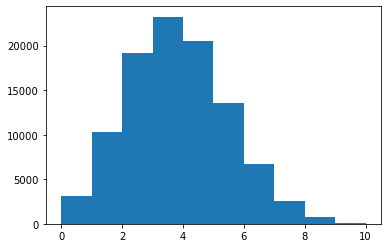

In [124]:
plt.hist(sample_sums)

In [125]:
counts = Counter(sample_sums)
uniq_size = len(counts)
cdf_array = np.array([0], dtype=float)
for i in range(1, uniq_size):
    cdf_array = np.append(cdf_array, cdf_array[i - 1] + i * counts[i])

max_val = cdf_array.max()
for i in range(uniq_size):
    cdf_array[i] = cdf_array[i] / float(max_val)
cdf_array = np.append(cdf_array, 1.0)

In [126]:
# X = range(0, uniq_size)
# cdf = spi.CubicSpline(X, cdf_array)
#
# X = np.linspace(0, uniq_size, 1000)
# Y = cdf(X)
# plt.plot(X, Y)

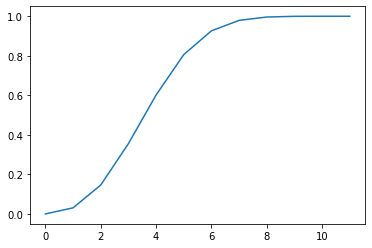

In [127]:
plt.plot(cdf_array)

In [128]:
sums = range(uniq_size)
prob = []
for i in range(uniq_size):
    prob.append(cdf_array[i + 1] - cdf_array[i])

0.7540376476666196

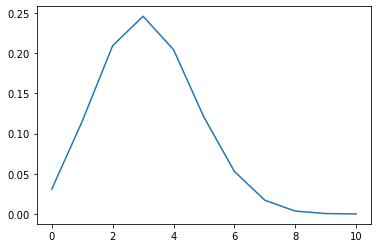

In [130]:
plt.plot(sums, prob)

1 - prob[3]